## Task 1

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Bike-Sharing-Dataset/hour.csv')

We are intersted in the following plots:

1. total count vs time
2. scatter plot of a registered vs total count
3. density map of a registered vs total count

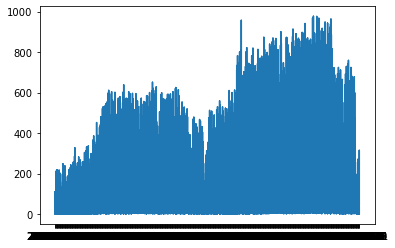

In [23]:
plt.plot(data["dteday"], data["cnt"])


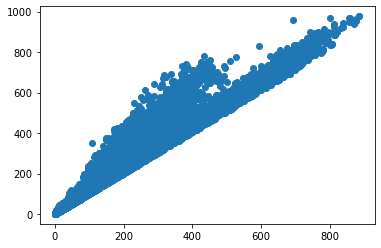

In [25]:
plt.scatter(data["registered"], data["cnt"])

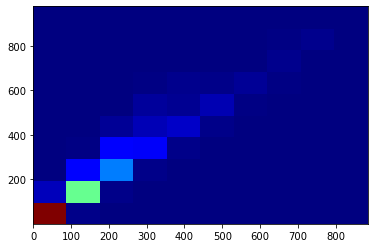

In [28]:
plt.hist2d(data["registered"], data["cnt"], bins=(10, 10), cmap=plt.cm.jet);

## Task 2

We implmenented the following pipeline:

1. Loading : loading csv file
2. Clean Data by dropping column instant which we don't need.
3. Process 
4.  Wrangling 

### 1. Loading

In [30]:
data = pd.read_csv('Bike-Sharing-Dataset/hour.csv')
print(data.head(10))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   
7        8  2011-01-01       1   0     1   7        0        6           0   
8        9  2011-01-01       1   0     1   8        0        6           0   
9       10  2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16

### 2. Clean Data

In [9]:
data.drop('instant', axis=1, inplace=True)

Let's confirm if column instant has been removed

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### 3. Process Data

In [32]:
data['total'] = data['registered'] + data['casual']

In [41]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


### 4. Wrangle Data

Check if the column total (sum of 

In [42]:

count = data['cnt'] == data['total']

In [45]:
assert count.sum() == len(data)

## Task 3

### Step 1

In [14]:
#data = pd.read_csv('Bike-Sharing-Dataset/hour.csv')

In [15]:
# Method chaining begins
import numpy as np
df = pd.read_csv('Bike-Sharing-Dataset/hour.csv').drop('instant', axis=1).assign(registered_ratio=data['registered']/ data['cnt']).assign(casual_ratio=data['casual']/ data['cnt']).assign(yr=lambda x: np.where(x.yr==0, 2011, 2012))


df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_ratio,casual_ratio
0,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0.812500,0.187500
1,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0.800000,0.200000
2,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0.843750,0.156250
3,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0.769231,0.230769
4,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0.907563,0.092437
17375,2012-12-31,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0.910112,0.089888
17376,2012-12-31,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0.922222,0.077778
17377,2012-12-31,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0.786885,0.213115


In [16]:
def load_and_process(url_or_path_to_csv_file):
    df = pd.read_csv(url_or_path_to_csv_file).drop('instant', axis=1).assign(registered_ratio=lambda x : x['registered']/ x['cnt']).assign(casual_ratio=lambda x :x['casual']/ x['cnt']).assign(yr=lambda x: np.where(x.yr==0, 2011, 2012))
    return df

In [17]:
load_and_process('Bike-Sharing-Dataset/hour.csv')

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_ratio,casual_ratio
0,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0.812500,0.187500
1,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0.800000,0.200000
2,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0.843750,0.156250
3,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0.769231,0.230769
4,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0.907563,0.092437
17375,2012-12-31,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0.910112,0.089888
17376,2012-12-31,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0.922222,0.077778
17377,2012-12-31,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0.786885,0.213115


In [18]:
import project_functions
df = project_functions.load_and_process('Bike-Sharing-Dataset/hour.csv')
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_ratio,casual_ratio
0,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0.812500,0.187500
1,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0.800000,0.200000
2,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0.843750,0.156250
3,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0.769231,0.230769
4,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0.907563,0.092437
17375,2012-12-31,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0.910112,0.089888
17376,2012-12-31,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0.922222,0.077778
17377,2012-12-31,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0.786885,0.213115
